# New Car Project

## SOMMAIRE
- Libraries Import
- Dataset Import
- Data Exploration
- Dataset Creation, Train and Test
- Building Model 1 : scipy => stats => linregress
- Building Model 2 : numpy => polyfit
- Building Model 3 : scikit learn => LinearRegression
- Building Model 4 : statsmodel => OLS (moindres carrés = Ordinary Least Squares)
- Comparaison des modèles univariés
- Building model : multiple avec sklearn
- Comparaison des modèles multivariés
- CONCLUSION
- Modèle Personnalisé
- Performance du modèle personnalisé
- Quel prix pour un véhicule de moins de 7 ans, moins de 100 000 km avec boîte manuelle ?

## Libraries Import

In [1]:
#Data import & Exploring
import pandas as pd
import missingno as msno

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data Analysis
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

## Dataset Import

In [2]:
df = pd.read_csv('carData.csv', sep = ',')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data Exploration

In [3]:
type(df.Car_Name[0])

str

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.isna()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

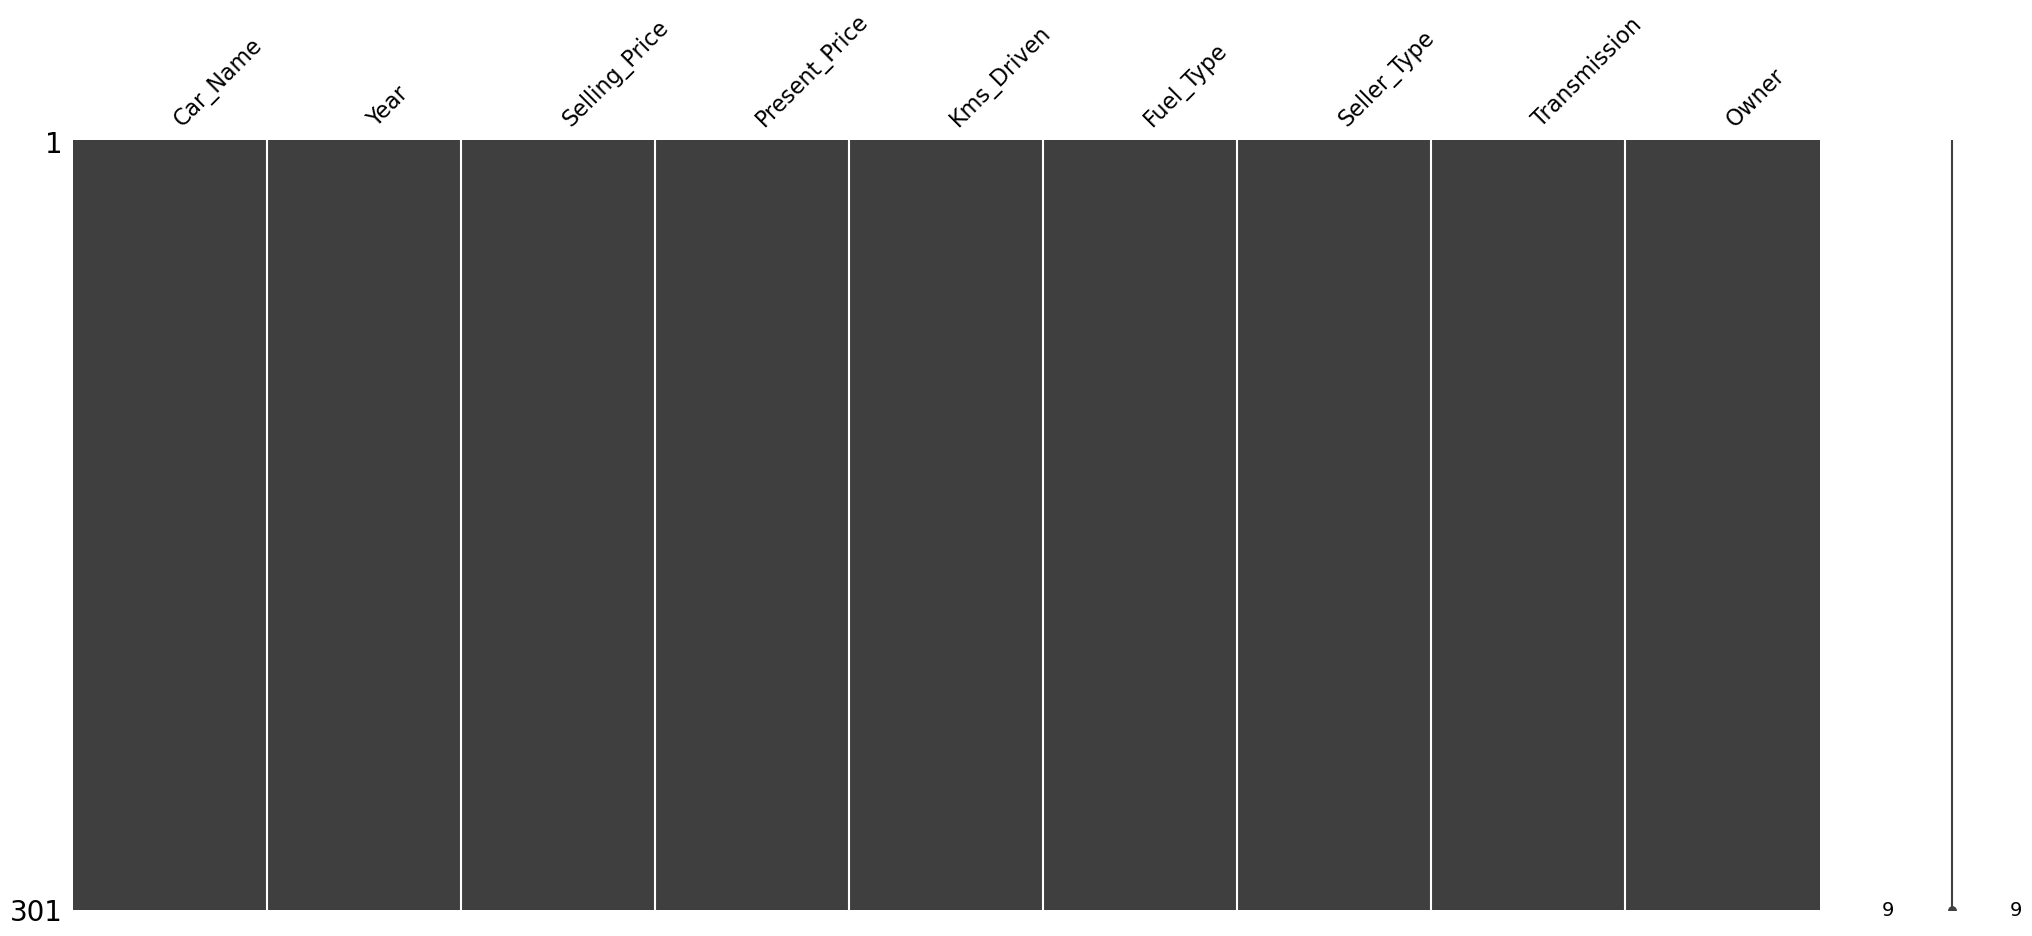

In [7]:
msno.matrix(df)

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Selling_Price'}>,
        <AxesSubplot:title={'center':'Present_Price'}>],
       [<AxesSubplot:title={'center':'Kms_Driven'}>,
        <AxesSubplot:title={'center':'Owner'}>, <AxesSubplot:>]],
      dtype=object)

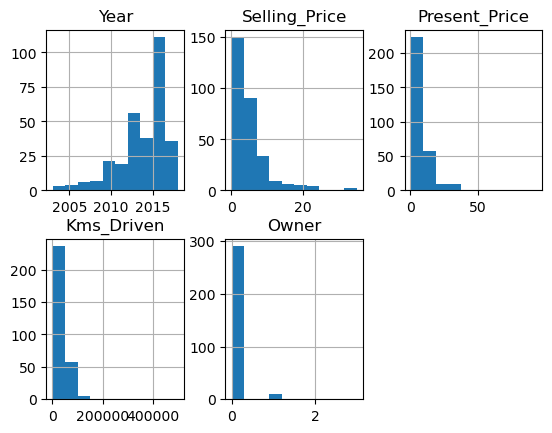

In [8]:
df.hist(layout=(2,3))

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Text(0.5, 1.0, 'TITRE')

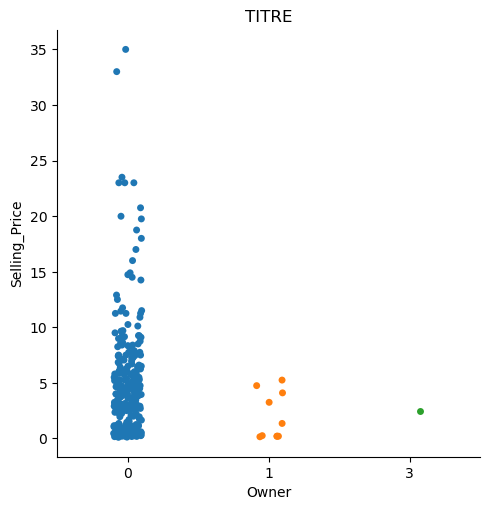

In [10]:
sns.catplot(data=df, x='Owner', y='Selling_Price')
plt.title('TITRE')
#PERTINENT SI LES DONNEES SONT QUALITATIVES

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

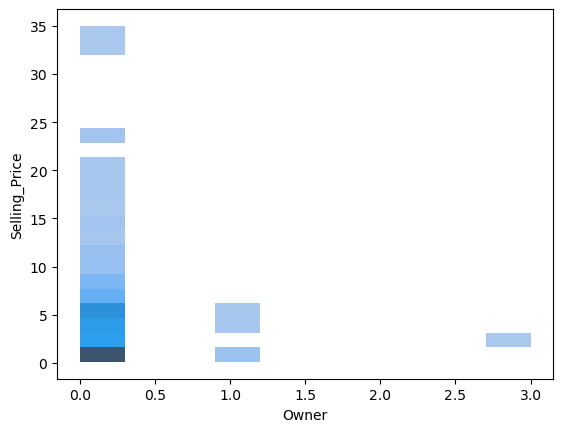

In [11]:
sns.histplot(data=df, x='Owner', y='Selling_Price')

In [12]:
df[df["Owner"]==3]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
85,camry,2006,2.5,23.73,142000,Petrol,Individual,Automatic,3


Text(0.5, 1.0, 'Matrice de corrélation')

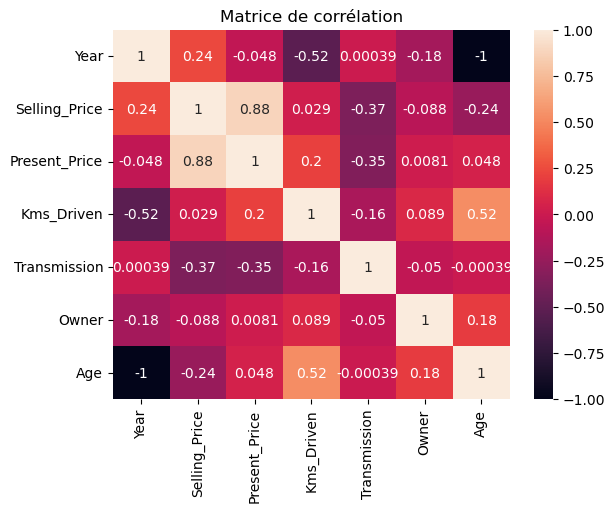

In [59]:
sns.heatmap(df.corr(), annot = True)
plt.title('Matrice de corrélation')
#RELATION ENTRE AGE ET PRIX DE VENTE FAIBLE => 0,25

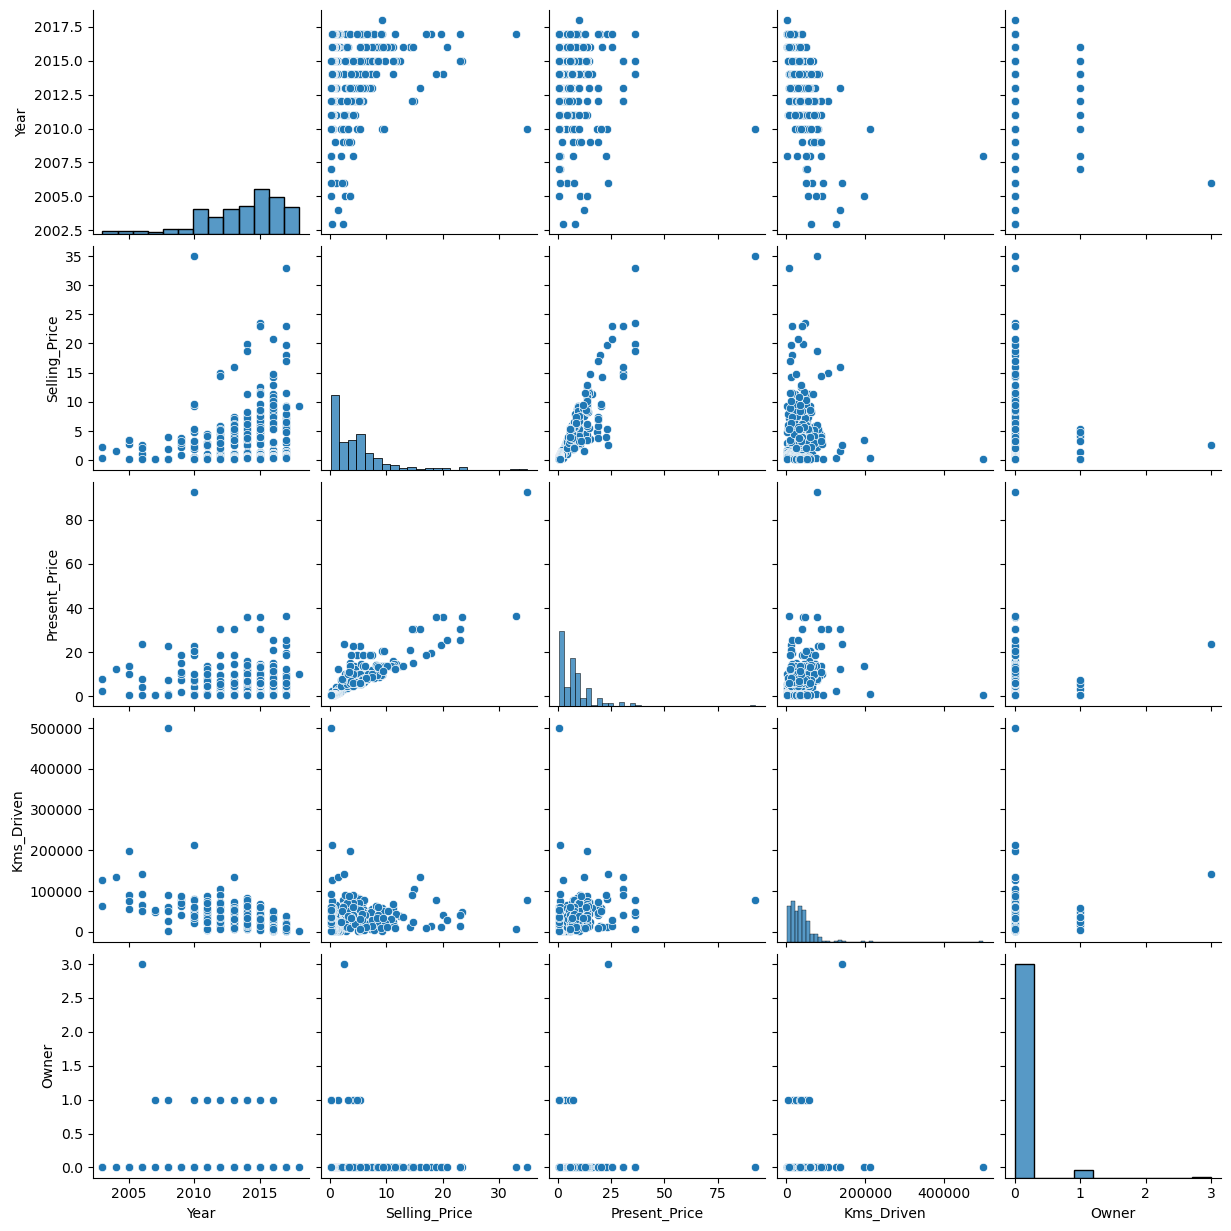

In [14]:
sns.pairplot(df)

# Jeu de données moyennement adapté car les données ne sont pas continues

OU existe-t-il ???
Pas compris, voir avec K.

## Dataset Creation, Train and Test

In [61]:
#selection de la 2e colonne de notre dataset (année)
X = df.Year.max() + 1 - df.Year

#selection de la 3e colonnes de notre dataset (prix)
Y = df.Selling_Price

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 42)

## Building Model 1 : scipy => stats => linregress

### Model 1 - Train

In [62]:
slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = stats.linregress(X_train, Y_train)
print('slope :', slope_1)
print('intercept :', intercept_1)
print('r² :', r_value_1**2)
print('p :', p_value_1)
print('std error :', std_err_1)

slope : -0.3921431249855978
intercept : 6.732087736902415
r² : 0.04820573819698011
p : 0.0006136384365000183
std error : 0.11294793599920876


In [63]:
def predict(x):
    return slope_1 * x + intercept_1

fit_1 = predict(X_train)

Text(0, 0.5, 'Prix de vente ($)')

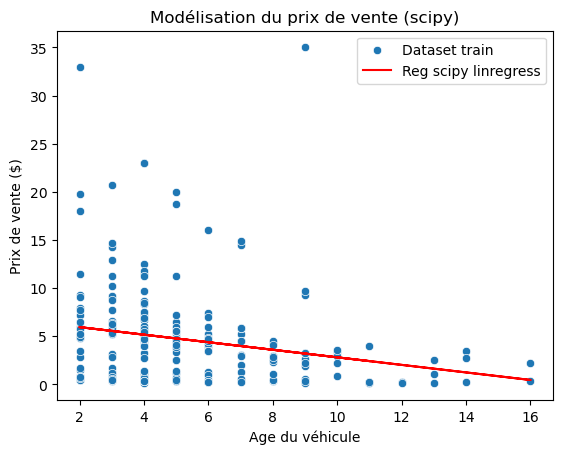

In [64]:
sns.scatterplot(data=df, x=X_train, y=Y_train, label='Dataset train')
plt.plot(X_train, fit_1, c='r', label='Reg scipy linregress')
plt.legend()

# Set title
plt.title('Modélisation du prix de vente (scipy)')
# Set x-axis label
plt.xlabel('Age du véhicule')
# Set y-axis label
plt.ylabel('Prix de vente ($)')

### Model 1 - Validation

Text(0, 0.5, 'Prix de vente ($)')

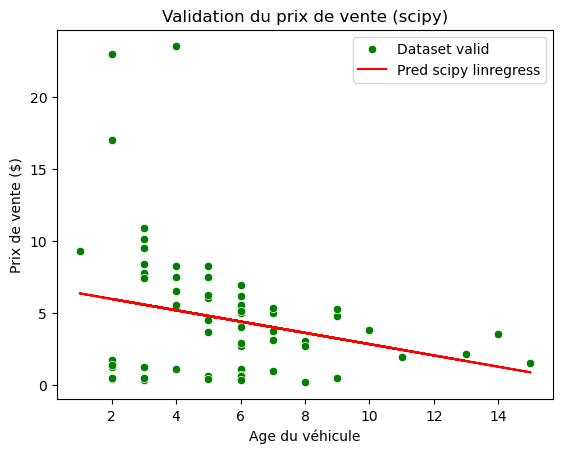

In [65]:
Y_pred_1 = predict(X_valid)

sns.scatterplot(data=df, x=X_valid, y=Y_valid, color='g', label='Dataset valid')
plt.plot(X_valid, Y_pred_1, c='r', label='Pred scipy linregress')
plt.legend()

# Set title
plt.title('Validation du prix de vente (scipy)')
# Set x-axis label
plt.xlabel('Age du véhicule')
# Set y-axis label
plt.ylabel('Prix de vente ($)')

In [66]:
slope_1V, intercept_1V, r_value_1V, p_value_1V, std_err_1V = stats.linregress(Y_valid, Y_pred_1)
print('r² Validation : ', r_value_1V**2)
print('r² Train : ', r_value_1**2)

r² Validation :  0.09459237408936529
r² Train :  0.04820573819698011


## Building Model 2 : numpy => polyfit

### Model 2 - Train

In [67]:
coeffs_2 = np.polyfit(X_train, Y_train, 1)
slope_2 = coeffs_2[0]
intercept_2 = coeffs_2[1]

correlation_2 = np.corrcoef(X_train, Y_train)[0, 1]
print('r²', correlation_2**2)

r² 0.04820573819698011


In [68]:
def predict(x):
    return slope_2 * x + intercept_2

fit_2 = predict(X_train)

Text(0, 0.5, 'Prix de vente ($)')

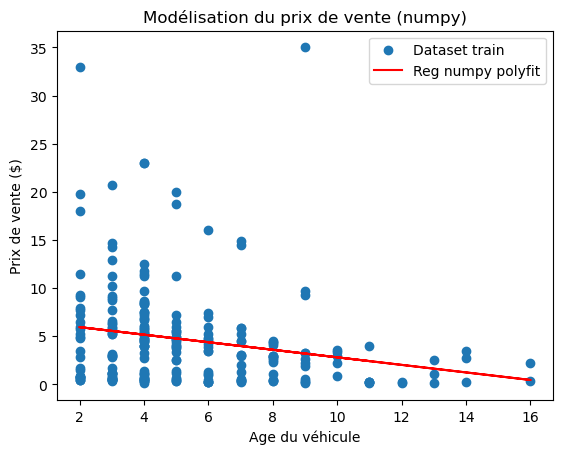

In [69]:
plt.scatter(X_train, Y_train, label='Dataset train')
plt.plot(X_train, fit_2, c='red', label='Reg numpy polyfit')
plt.legend()

# Set title
plt.title('Modélisation du prix de vente (numpy)')
# Set x-axis label
plt.xlabel('Age du véhicule')
# Set y-axis label
plt.ylabel('Prix de vente ($)')

### Model 2 - Validation

Text(0, 0.5, 'Prix de vente ($)')

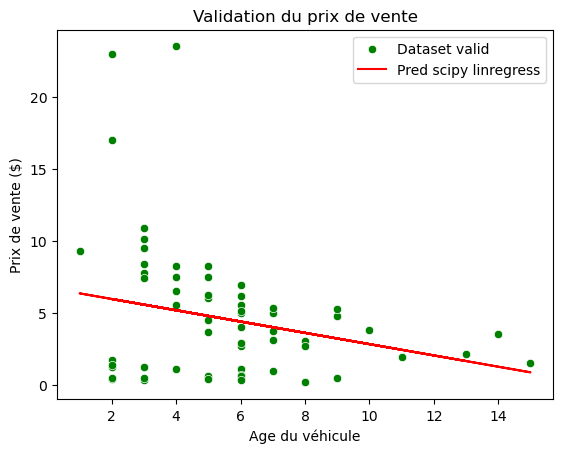

In [70]:
Y_pred_2 = predict(X_valid)

sns.scatterplot(data=df, x=X_valid, y=Y_valid, color='g', label='Dataset valid')
plt.plot(X_valid, Y_pred_2, c='r', label='Pred scipy linregress')
plt.legend()

# Set title
plt.title('Validation du prix de vente')
# Set x-axis label
plt.xlabel('Age du véhicule')
# Set y-axis label
plt.ylabel('Prix de vente ($)')

In [71]:
correlation_2V = np.corrcoef(Y_valid, Y_pred_2)[0, 1]

print('r² Validation : ', correlation_2V**2)
print('r² Train : ', correlation_2**2)

r² Validation :  0.09459237408936526
r² Train :  0.04820573819698011


## Building Model 3 => scikit learn => LinearRegression

### Model 3 - Train

In [72]:
Xr = X_train.array.reshape(-1, 1)

#instancier modèle
model = LinearRegression()

#entrainement du modèle
model.fit(Xr, Y_train)

#précision du modèle
r2_3 = model.score(Xr, Y_train)
print('r²', r2_3)

intercept_3 = model.intercept_
print('Intercept', intercept_3)
slope_3 = model.coef_
print('Slope', slope_3)

#prédiction
fit_3 = model.predict(Xr)

r² 0.04820573819698026
Intercept 6.732087736902416
Slope [-0.39214312]


In [73]:
def predict(x):
    return slope_3 * x + intercept_3

Text(0, 0.5, 'Prix de vente')

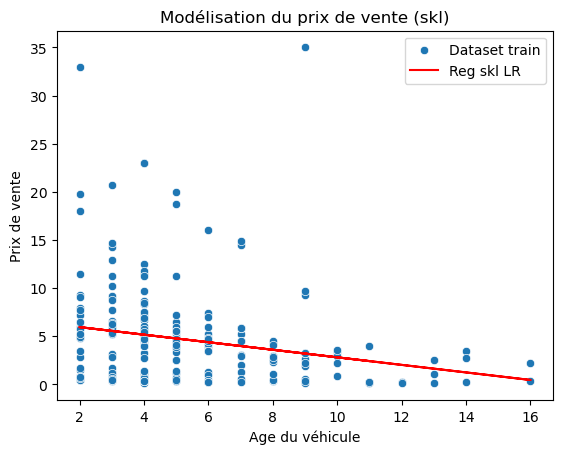

In [76]:
sns.scatterplot(data=df, x=X_train, y=Y_train, label='Dataset train')
plt.plot(X_train, fit_3, color='red', label='Reg skl LR')
plt.legend()

# Set title
plt.title('Modélisation du prix de vente (skl)')
# Set x-axis label
plt.xlabel('Age du véhicule')
# Set y-axis label
plt.ylabel('Prix de vente')

### Model 3 - Validation

In [77]:
Y_pred_3 = predict(X_valid)

Text(0, 0.5, 'Prix de vente')

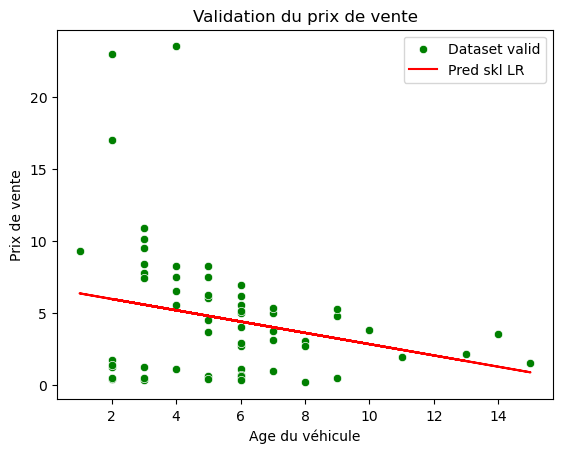

In [78]:
sns.scatterplot(data=df, x=X_valid, y=Y_valid, color='g', label='Dataset valid')
plt.plot(X_valid, Y_pred_3, c='r', label='Pred skl LR')
plt.legend()

# Set title
plt.title('Validation du prix de vente')
# Set x-axis label
plt.xlabel('Age du véhicule')
# Set y-axis label
plt.ylabel('Prix de vente')

In [55]:
model.fit(Y_valid.array.reshape(-1, 1), Y_pred_3)

LinearRegression()

In [58]:
r2_3V = model.score(Y_valid.array.reshape(-1, 1), Y_pred_3)
print('r² Validation : ', r2_3V**2)
print('r² Train : ', r2_3)

r² Validation :  0.008947717235862402
r² Train :  0.04820573819698026


## Building Model 4 => statsmodel => OLS (moindres carrés = Ordinary Least Squares)

### Model 4 - Train

In [32]:
X_train_sm = sm.add_constant(X_train)
#print(X_train, X_train_sm)

In [33]:
lr = sm.OLS(Y_train, X_train_sm).fit()

In [34]:
lr.params

const    6732.087737
Year     -392.143125
dtype: float64

In [35]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     12.05
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           0.000614
Time:                        17:12:40   Log-Likelihood:                -2385.4
No. Observations:                 240   AIC:                             4775.
Df Residuals:                     238   BIC:                             4782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6732.0877    684.128      9.840      0.000    5384.368    8079.807
Year        -392.1431    112.948     -3.472      0.001    -614.648    -169.638
==============================================================================
Omnibus:                      161.804   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1405.567
Skew:                           2.643   Prob(JB):                    6.10e-306
Kurtosis:                      13.612   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Prix de vente ($)')

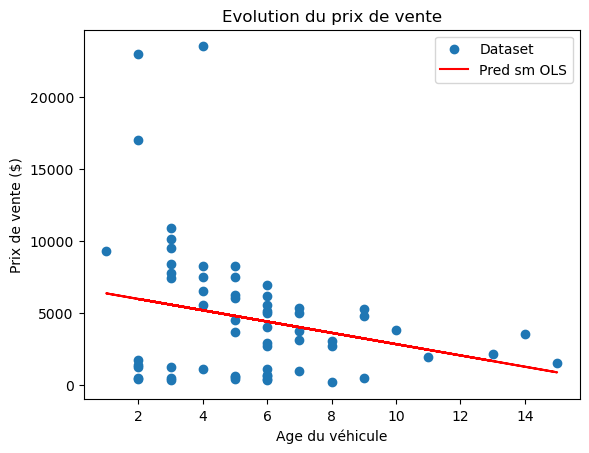

In [36]:
plt.scatter(X_valid, Y_valid, label='Dataset')
plt.plot(X_valid, lr.params.const + lr.params.Year * X_valid, c='red', label='Pred sm OLS')
plt.legend()

# Set title
plt.title('Evolution du prix de vente')
# Set x-axis label
plt.xlabel('Age du véhicule')
# Set y-axis label
plt.ylabel('Prix de vente ($)')

## Comparaison des modèles univariés

Text(0, 0.5, 'Prix de vente ($)')

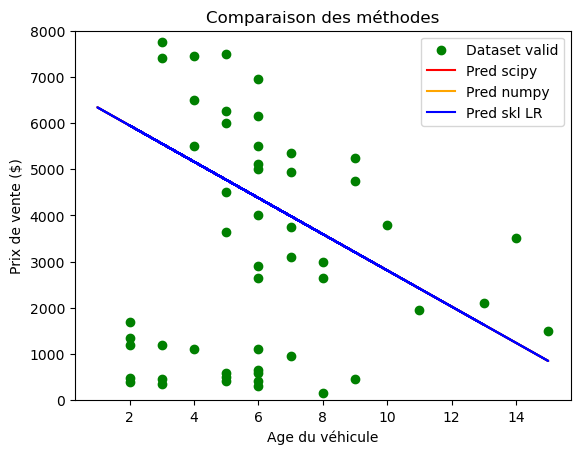

In [37]:
plt.scatter(X_valid, Y_valid, color='green', label='Dataset valid')
plt.plot(X_valid, Y_pred_1, c='red', label='Pred scipy')
plt.plot(X_valid, Y_pred_2, c='orange', label='Pred numpy')
plt.plot(X_valid, Y_pred_3, c='blue', label='Pred skl LR')
plt.legend()

plt.ylim((0,8000))

# Set title
plt.title('Comparaison des méthodes')
# Set x-axis label
plt.xlabel('Age du véhicule')
# Set y-axis label
plt.ylabel('Prix de vente ($)')

In [38]:
print('slopes', slope_1, slope_2, slope_3)

slopes -392.14312498559764 -392.1431249855983 [-392.14312499]


## Building model : multiple avec sklearn

In [39]:
#selection de la 2e colonne de notre dataset (année)
X = df.Year.max() + 1 - df.Year

#selection de la 3e colonnes de notre dataset (prix)
Y = 1000 * df.Selling_Price

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [40]:
transmission_enc = pd.DataFrame(LabelEncoder().fit_transform(df['Transmission']))
df.drop(['Transmission'], axis = 1)
df['Transmission'] = transmission_enc
df['Age'] = df.Year.max() + 1 - df.Year

In [81]:
X = df[['Age', 'Kms_Driven','Transmission']]# get input values from first two columns

In [83]:
X

,Age,Kms_Driven,Transmission
0,5,27000,1
1,6,43000,1
2,2,6900,1
3,8,5200,1
4,5,42450,1
...,...,...,...
296,3,33988,1
297,4,60000,1
298,10,87934,1
299,2,9000,1


In [42]:
#type(df.Age)
#print(df.Age, df[['Age']])

Text(0.5, 1.0, 'Matrice de corrélation')

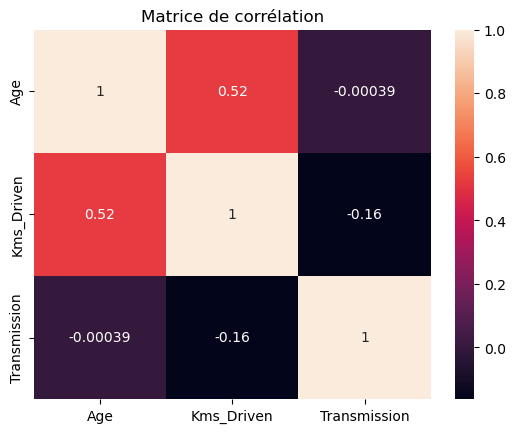

In [60]:
sns.heatmap(X.corr(), annot = True)
plt.title('Matrice de corrélation')

In [44]:
Xv = X.values
y = df.Selling_Price.values  # get output values from last coulmn

In [45]:
model_ols =  LinearRegression()
model_ols.fit(Xv, y) 

LinearRegression()

In [46]:
fit = model_ols.predict(Xv)

In [84]:
#précision du modèle
r2 = model_ols.score(Xv, y)
print('r² : ', r2)

intercept = model_ols.intercept_
print('Intercept (b) : ', intercept)
slope = model_ols.coef_
print('Slope (a) : ', slope)

r² :  0.2030998705892535
Intercept (b) :  11.387503618770225
Slope (a) :  [-5.38542399e-01  1.74728571e-05 -5.16506926e+00]


C:\Users\utile\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Modèle Personnalisé

In [ ]:
class RL():
    def __init__(self):       
        self.a = 0
        self.b = 0
        self.error = 0
        self.r = 0

    def fit(self,X ,Y):  
        i_max = np.where(X==max(X))
        i_min = np.where(X==min(X))
        i_moy = int(len(X) / 2)
        
        a0 = (Y[i_max] - Y[i_min]) / (X[i_max] - X[i_min])
        b0 = Y[i_moy] - a0 * X[i_moy]
        
        self.a = a0
        self.b = b0
        
        #print('a0 : ', a0)
        #print('b0 : ', b0)

In [ ]:
def dist(P, Q):
    return (P - Q)**2

In [ ]:
def err(X, Y, a, b):
    N = len(X)
    error = 0
    
    for i in range(N):
    
        pred = a * X[i] + b
        error = error + dist(Y[i], pred)
        
    return error

In [ ]:
def gradE(X, Y, a, b):

    N = len(X)
    dEda = 0
    dEdb = 0
    
    for i in range(N):
        x = X[i]
        y = Y[i]
        U = - 2 * x * (y - (a * x + b))
        V = - 2 * (y - (a * x + b))
        
        dEda = dEda + U
        dEdb = dEdb + V
        
        return (dEda, dEdb)

In [ ]:
#X = [32, 3]
#Y = [96, 9]
X = df.Year.values
Y = df.Selling_Price.values

In [ ]:
model = RL()

In [ ]:
fit_model = model.fit(X,Y)

In [ ]:
print('a : ', model.a)
print('b : ', model.b)

## Performance du modèle personnalisé

## Quel prix pour un véhicule de moins de 7 ans, moins de 100 000 km avec boîte manuelle ?

In [86]:
P = 11.387503618770225 + 7 * -5.38542399e-01 + 100000 * 1.74728571e-05 + 1 * -5.16506926e+00

In [87]:
P

4.199923275770225